# Analisis de series de Netflix

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

📊 Información General
| Aspecto  | Descripcion |
| ------------- |:-------------:|
| Nombre del DataSet      |   netfilx_titles.csv   |
| Total de Registros      |   8807   |
| Total de Variables      |   12 columnas   |
| Fuente de Datos      |   Kaggle   |
| Propósito del Análisis      |  Análisis Descriptivo   |

Estructura de Variables
| Variable  | Descripcion | Tipo |
| ------------- |:-------------:|:-------------------:|
| show_id      |   Identificador unico de pelicula/serie   | object |
| type     |   Identificador de tipo si es pelicula/serie   | object |
| title      |   Titulo de pelicula/serie  | object |
| director      |   Director a cargo de pelicula/serie   | object |
| cast      |  Elenco de actores   | object |
| country | Pais donde se producio pelicula/serie  | object |
| date_added | Fecha en que se agrego a Netflix | object |
| release_year | Año de lanzamiento | int64 |
| rating | Clasificacion de pelicula/serie | object |
| duration | Total de duracion (min/season) | object |
| listed_in | Genero o tipo de la pelicula/serie | object |
| description | Descripcion de la pelicula | object |

## Proceso ETL
1. Extraer: La informacion va ha ser extraida del archivo netflix_titles.csv, son datos crudos
2. Tranformar: 
    * 1ro transformamos los tipos de datos para que sean todos uniformes, tanto str como datetime
    * 2do Manejo de datos nulos:
        * Se identifican los datos nulos 
        * Se rellenan o se eliminan los datos en proporcion a la cantidad de datos nulos sobre el total de datos
        * Se informa si la cantidad de datos nulos eliminados
    * 3ro Se eliminan los datos duplicados 
3. Cargar: Se guarda lo datos ya procesados para su uso en el archivo netflix_titles_procesado.csv


### Lectura de CSV e informacion de los datos

In [70]:
df = pd.read_csv('../Dataset/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [71]:
# dimnesion del DataFrame
df.shape

(8807, 12)

In [72]:
# informacion del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Formateo de tipo de datos

In [73]:
SHOR_DATE = ['date_added'] # no se hara uso de esta variable pero se deja para referencia futura
FULL_DATE = ['release_year'] # no se hara uso de esta variable pero se deja para referencia futura
TEXT_FOR_CAPITALIZE = ['description'] # no se hara uso de esta variable pero se deja para referencia futura
TEXT_FOR_TITLE = ['title', 'director', 'cast', 'country', 'listed_in']

df['description'] = df['description'].apply(lambda x: x.capitalize())
df['show_id']= df['show_id'].apply(lambda x: x.lower())
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y').dt.strftime('%Y')
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed').dt.strftime('%d/%m/%Y')
df[TEXT_FOR_TITLE] = df[TEXT_FOR_TITLE].apply(lambda x: x.str.title())
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25/09/2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24/09/2021,2021,TV-MA,2 Seasons,"International Tv Shows, Tv Dramas, Tv Mysteries","After crossing paths at a party, a cape town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24/09/2021,2021,TV-MA,1 Season,"Crime Tv Shows, International Tv Shows, Tv Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24/09/2021,2021,TV-MA,1 Season,"Docuseries, Reality Tv","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24/09/2021,2021,TV-MA,2 Seasons,"International Tv Shows, Romantic Tv Shows, Tv ...",In a city of coaching centers known to train i...


### Manejo de datos nulos

> Se identifico las columan del Dataset y se creo una funcion para verla cnt de datos nulos y que tanto representaban con el total
>
>> para los datos que tienen un % < 5% se opto por eliminar dichos datos
>
>> para los datos que tienen un % > 5% se opto por rellenar dichos datos 
>
*Esto va a ayudar a que no se pierdan gran cantidad de datos*

In [74]:
lista = df.columns.tolist()
print(lista)


['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [75]:
# Funcion para ver el resumen de datos nulos de cada columna
def cnt_nulos_columnas(dataframe, columnas):
    dfResumenNulos = pd.DataFrame(
        {"Columna": [], "Cantidad_Nulos": [], "Porcentaje_Nulos (%)": []}
    )
    for columna in columnas:
        cnt_nulos = dataframe[columna].isnull().sum()
        porcentaje_nulos = (cnt_nulos / len(dataframe)) * 100
        dfResumenNulos.loc[len(dfResumenNulos)] = [columna, cnt_nulos, porcentaje_nulos]
    return dfResumenNulos

print(cnt_nulos_columnas(df, lista))


         Columna  Cantidad_Nulos  Porcentaje_Nulos (%)
0        show_id               0              0.000000
1           type               0              0.000000
2          title               0              0.000000
3       director            2634             29.908028
4           cast             825              9.367549
5        country             831              9.435676
6     date_added              10              0.113546
7   release_year               0              0.000000
8         rating               4              0.045418
9       duration               3              0.034064
10     listed_in               0              0.000000
11   description               0              0.000000


In [76]:
# Rellenar los valores nulos en las columnas 'director', 'cast' y 'country' con 'Desconocido' o 'Desconocidos' ya que tienen un % alto de nulos
df = df.fillna({'director': 'Desconocido', 'cast': 'Desconocidos', 'country': 'Desconocido'})

In [77]:
# Eliminar filas con valores nulos en las columnas 'date_added', 'rating' y 'duration' ya que son importantes para el análisis 
df = df.dropna(subset=['date_added', 'rating', 'duration'])

In [78]:
# Verificacion de nulos despues del tratamiento
print(cnt_nulos_columnas(df, lista))

         Columna  Cantidad_Nulos  Porcentaje_Nulos (%)
0        show_id               0                   0.0
1           type               0                   0.0
2          title               0                   0.0
3       director               0                   0.0
4           cast               0                   0.0
5        country               0                   0.0
6     date_added               0                   0.0
7   release_year               0                   0.0
8         rating               0                   0.0
9       duration               0                   0.0
10     listed_in               0                   0.0
11   description               0                   0.0


### Manejo de datos duplicados

In [79]:
cnt_duplicados = df.duplicated(subset=['show_id']).sum()
if cnt_duplicados > 0:
    df = df.drop_duplicates(subset=['show_id'])
    print(f"Se eliminaron {cnt_duplicados} registros duplicados en la columna 'show_id'")
else:
    print("No hay registros duplicados en la columna 'show_id'")

df.head()

No hay registros duplicados en la columna 'show_id'


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Desconocidos,United States,25/09/2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Desconocido,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24/09/2021,2021,TV-MA,2 Seasons,"International Tv Shows, Tv Dramas, Tv Mysteries","After crossing paths at a party, a cape town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Desconocido,24/09/2021,2021,TV-MA,1 Season,"Crime Tv Shows, International Tv Shows, Tv Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Desconocido,Desconocidos,Desconocido,24/09/2021,2021,TV-MA,1 Season,"Docuseries, Reality Tv","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Desconocido,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24/09/2021,2021,TV-MA,2 Seasons,"International Tv Shows, Romantic Tv Shows, Tv ...",In a city of coaching centers known to train i...


### Guardado de datos procesados

In [80]:
df.to_csv('../Dataset/netflix_titles_procesado.csv', index=False)

## Informe del DataSet
_Se generan graficos para un analisi descriptivo segun corresponda_

In [ ]:
df_procesados = pd.read_csv('../Dataset/netflix_titles_procesado.csv')

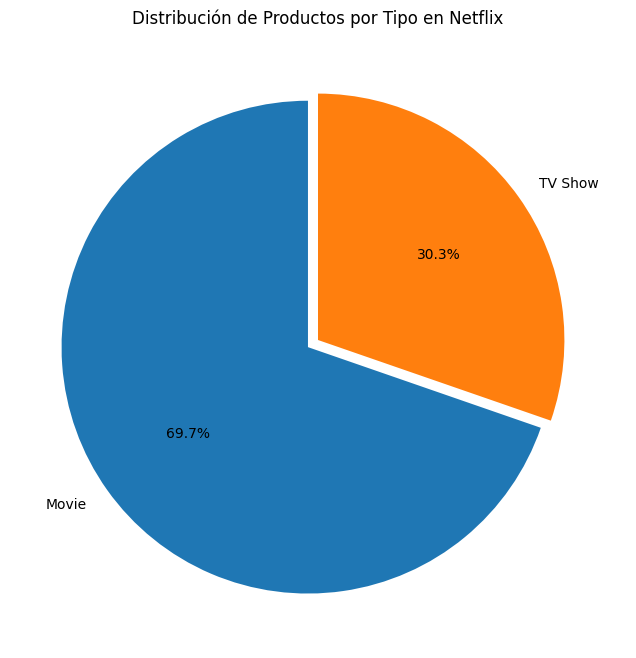

Se puede apresiar que Netflix ha apostado más por las películas 6126 en comparacion a las series 2664


In [ ]:
# Visualización: Distribución de productos por tipo
cnt_producto_por_tipo = df_procesados.value_counts('type')

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(cnt_producto_por_tipo, autopct='%1.1f%%', startangle=90, labels=cnt_producto_por_tipo.index, explode=[0.05, 0])
ax.set_title("Distribución de Productos por Tipo en Netflix")
plt.show()
print(f'Se puede apresiar que Netflix ha apostado más por las películas {cnt_producto_por_tipo["Movie"]} en comparacion a las series {cnt_producto_por_tipo["TV Show"]}')

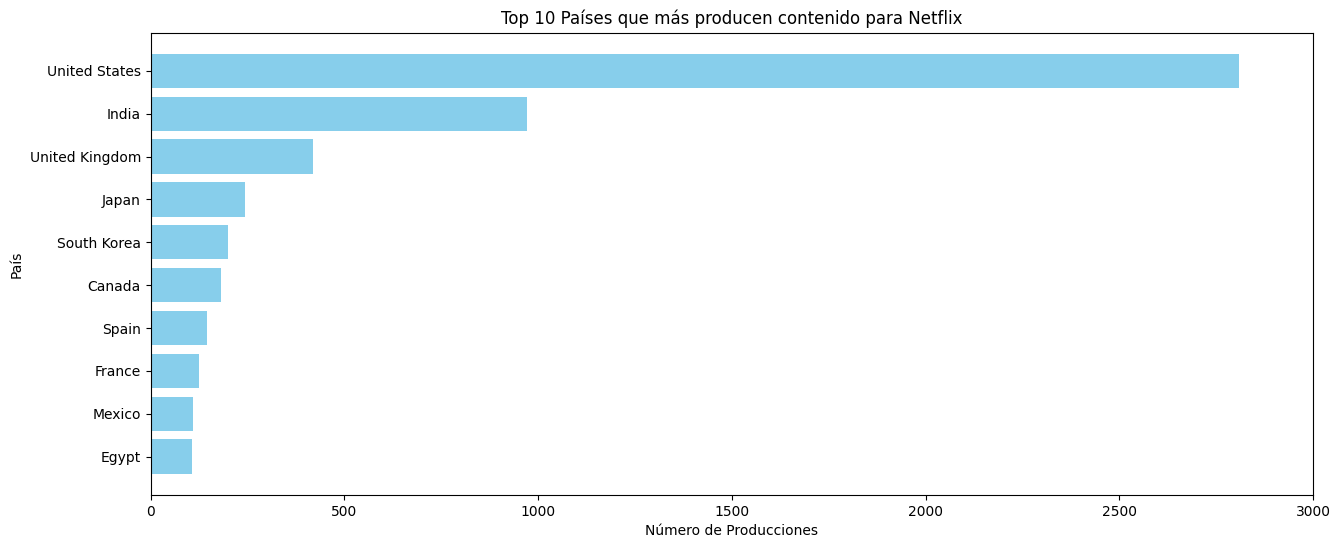

Se puede apresiar que los países que más producen contenido para Netflix son:
        country  count
 United States   2809
         India    972
United Kingdom    418
Tener en cuenta que la Cnt de países no incluye los registros con valor Desconocido y son 829 registros


In [ ]:
# Visualización: Evolución de la Cantidad de Productos Añadidos por Tipo y Año
countries_produce_more= df_procesados[df_procesados['country']!= 'Desconocido'].value_counts('country').head(10).sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(15,6))
ax.barh(countries_produce_more.index, countries_produce_more.values, color='skyblue')
ax.set_title("Top 10 Países que más producen contenido para Netflix")
ax.set_xlabel("Número de Producciones")
ax.set_ylabel("País")
plt.xlim(0,3000)
plt.show()
print(f'Se puede apresiar que los países que más producen contenido para Netflix son:\n {countries_produce_more.tail(3).to_frame().reset_index().sort_values(by='count',ascending=False).to_string(index=False)}')
print(f'Tener en cuenta que la Cnt de países no incluye los registros con valor Desconocido y son {df_procesados[df_procesados["country"]== "Desconocido"].shape[0]} registros')

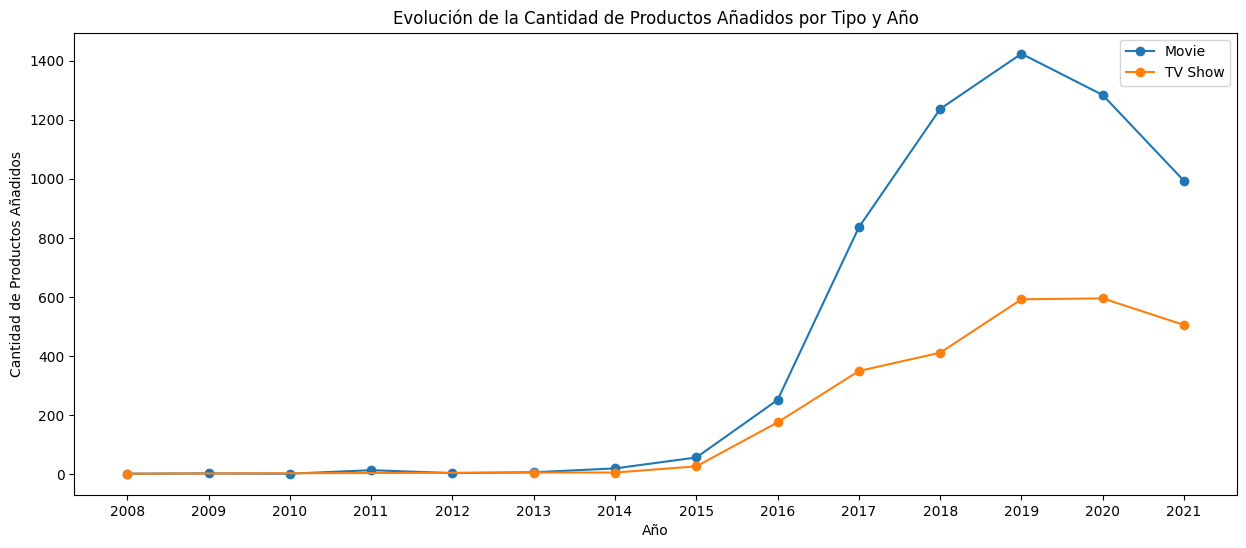

Se puede observar que la cantidad de productos añadidos a Netflix ha ido en aumento a lo largo de los años,
con un crecimiento más pronunciado en los últimos años para ambos tipos de productos (Movies y TV Shows).


In [ ]:
# Visualización: Top 10 Clasificaciones con Mayor Cantidad de Productos en Netflix
df_Type_YearAdded = df_procesados.copy()
df_Type_YearAdded['year_added'] = pd.to_datetime(df_procesados['date_added'], format='%d/%m/%Y').dt.strftime('%Y')
df_Type_YearAdded.groupby(by=['type', 'year_added']).count()['show_id'].to_frame()

fig, ax = plt.subplots(figsize=(15,6))
for tipo in df_Type_YearAdded['type'].unique():
    datos_tipo = df_Type_YearAdded[df_procesados['type'] == tipo].groupby('year_added').count()['show_id']
    ax.plot(datos_tipo.index, datos_tipo.values, marker='o', label=tipo)
ax.set_title("Evolución de la Cantidad de Productos Añadidos por Tipo y Año")
ax.set_xlabel("Año")
ax.set_ylabel("Cantidad de Productos Añadidos")
plt.legend()
plt.show()
print('Se puede observar que la cantidad de productos añadidos a Netflix ha ido en aumento a lo largo de los años,\ncon un crecimiento más pronunciado en los últimos años para ambos tipos de productos (Movies y TV Shows).')

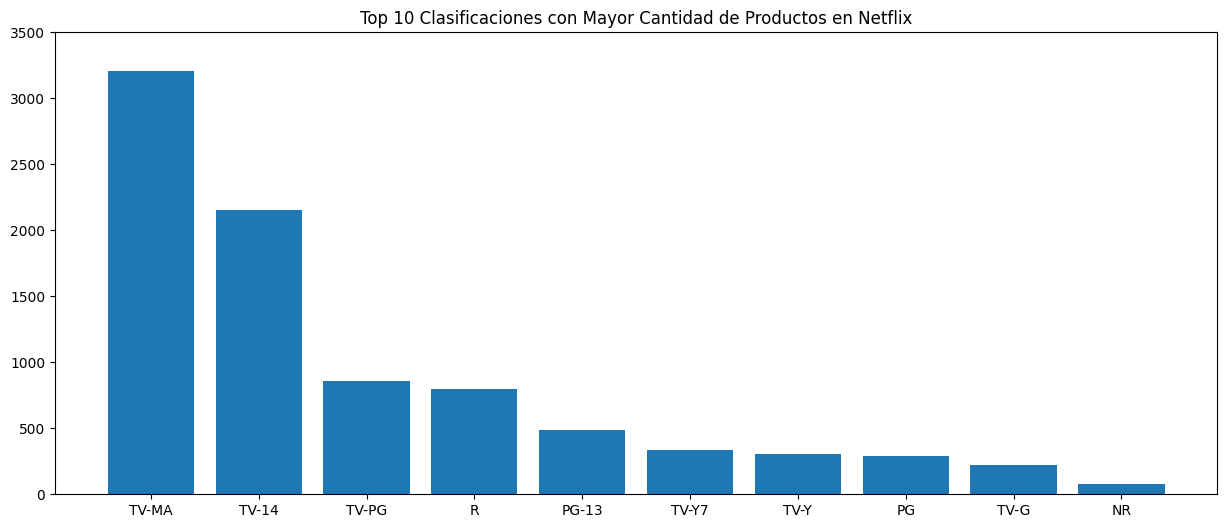

Se puede observar que las clasificaciones TV-MA con 3205 y TV-14 con 2157 son las clasificaciones con mayor cantidad de productos en Netflix con,
lo que indica que la plataforma ofrece una amplia variedad de contenido para audiencias adultas y adolescentes.


In [ ]:
# Visualización: Top 10 Clasificaciones con Mayor Cantidad de Productos en Netflix
df_rating= df_procesados.groupby(by=['rating']).count()['show_id'].to_frame().sort_values(by='show_id', ascending=False).head(10).copy()

fig, ax = plt.subplots(figsize=(15,6))
ax.bar(df_rating.index, df_rating['show_id'])
ax.set_title("Top 10 Clasificaciones con Mayor Cantidad de Productos en Netflix")
plt.ylim(0,3500)
plt.show()
print(f'Se puede observar que las clasificaciones TV-MA con {df_rating.loc['TV-MA','show_id']} y TV-14 con {df_rating.loc['TV-14','show_id']} son las clasificaciones con mayor cantidad de productos en Netflix con,\nlo que indica que la plataforma ofrece una amplia variedad de contenido para audiencias adultas y adolescentes.')

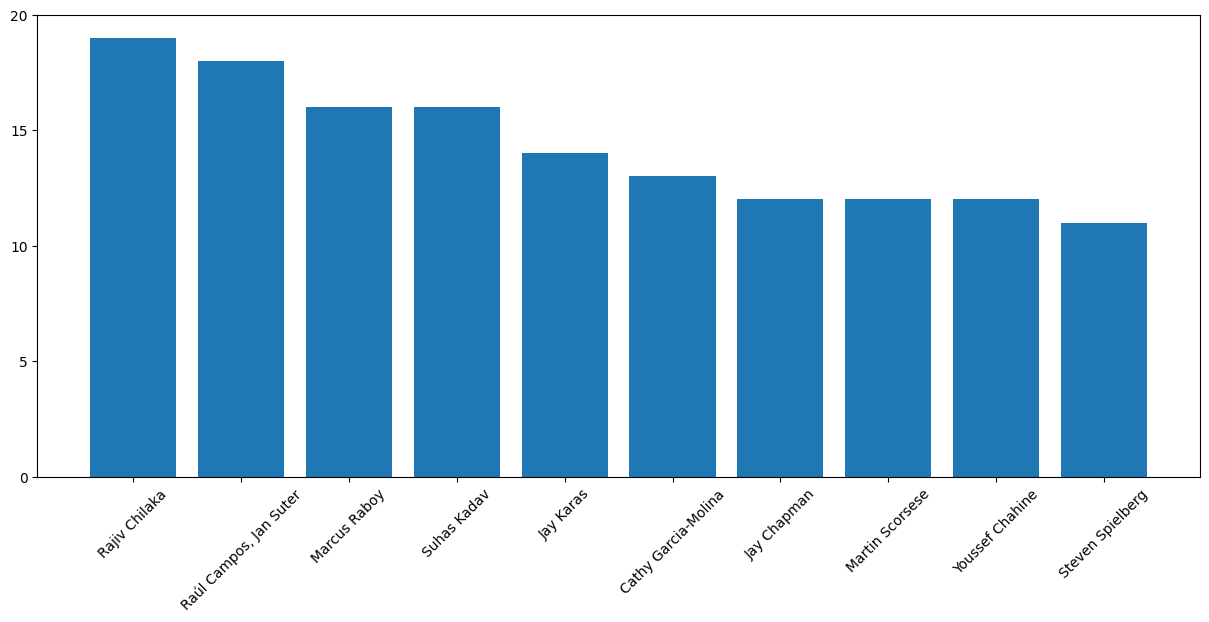

Se puede observar que los directores con mayor cantidad de producciones en Netflix son:
1. Rajiv Chilaka
2. Raul Campos
3. Marcus Raboy
Lo que indica que estos directores tienen una relación sólida con la plataforma y han contribuido significativamente a su catálogo de contenido.


In [ ]:
# Visualización: Top 10 Directores con Mayor Cantidad de Producciones en Netflix
df_directores= df_procesados[df_procesados['director']!= "Desconocido"].value_counts('director').head(10).copy()
fig, ax = plt.subplots(figsize=(15,6))
ax.bar(df_directores.index, df_directores.values)
ax.tick_params(axis='x', rotation=45)
plt.ylim(0,20)
plt.yticks(range(0, 21, 5))
plt.show()
print('Se puede observar que los directores con mayor cantidad de producciones en Netflix son:\n1. Rajiv Chilaka\n2. Raul Campos\n3. Marcus Raboy\nLo que indica que estos directores tienen una relación sólida con la plataforma y han contribuido significativamente a su catálogo de contenido.')